In [2]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kritsadakruapat/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

Tweet Sentiment Analysis Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.96      0.86      2814
     neutral       0.70      0.34      0.46       884
    positive       0.81      0.55      0.66       694

    accuracy                           0.77      4392
   macro avg       0.76      0.62      0.66      4392
weighted avg       0.76      0.77      0.74      4392



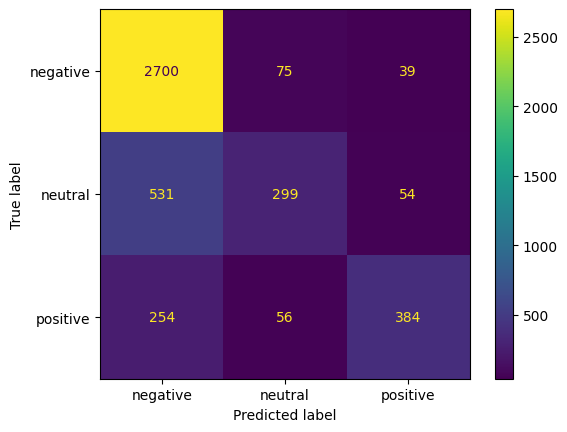

In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("Tweets.csv")

# Preprocessing for Tweets
def preprocess_text(text):
    # Remove mentions (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove non-alphabetic characters and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Clean tweet text
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Extract features and labels
X_tweet = df['cleaned_text'] # Feature
y_tweet = df['airline_sentiment'] # Label

#  Splitting 70% train, 30% test
X_train_tweet, X_test_tweet, y_train_tweet, y_test_tweet = train_test_split(X_tweet, y_tweet, test_size=0.3, random_state=42)

# Feature extraction for Tweets (Bag of Words)
count_vec = CountVectorizer()
X_train_bow_tweet = count_vec.fit_transform(X_train_tweet)
X_test_bow_tweet = count_vec.transform(X_test_tweet)

# Train a Naive Bayes model for Sentiment Classification on Tweets
model_tweet = MultinomialNB()
model_tweet.fit(X_train_bow_tweet, y_train_tweet)

# Evaluate the model on the test set
y_pred_tweet = model_tweet.predict(X_test_bow_tweet)

print("Tweet Sentiment Analysis Classification Report:")
print(classification_report(y_test_tweet, y_pred_tweet))

cm_tweet = confusion_matrix(y_test_tweet, y_pred_tweet)
disp_tweet = ConfusionMatrixDisplay(confusion_matrix=cm_tweet, display_labels=model_tweet.classes_)
disp_tweet.plot()
plt.show()
